# Linear Regresion and Gradient Descent example 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline


## Ingestion de Datos

Los datos contienen dos columnas, la polacion de la ciudad (en miles) y las ganancias (en 10K tambien)

In [2]:
data = pd.read_csv('ex1data1.txt', names = ['poblacion', 'ganancia'])

In [3]:
data.head()

,poblacion,ganancia
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## Grafica de los datos

In [4]:
## Divide la poblacion y ganancias en X y y dataframes
X_df = pd.DataFrame(data.poblacion)
y_df = pd.DataFrame(data.ganancia)

## Numero de observaciones en nuestros datos
m = len(y_df)

Text(0, 0.5, 'Ganancia en $10,000s')

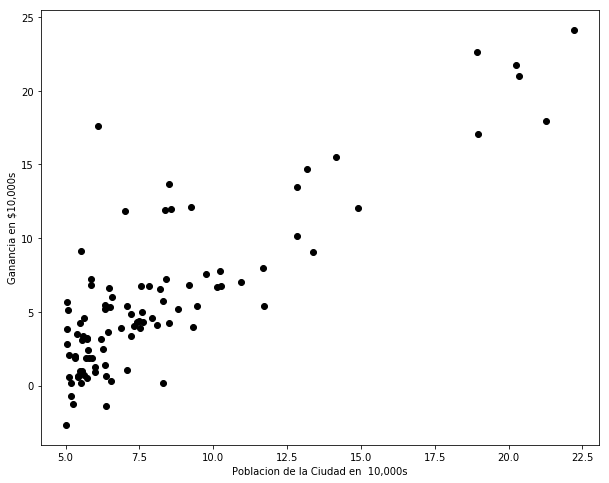

In [5]:
plt.figure(figsize=(10,8))
plt.plot(X_df, y_df,'ko')  #kx,kv,k.,ko porque son dataframes y no np arrays
plt.xlabel('Poblacion de la Ciudad en  10,000s')
plt.ylabel('Ganancia en $10,000s')


Vamos a elaborar un modelo   para encontrar la relacion entre la variable dependiente (y) and 
y un conjunto de variables independientes  ($x_1, x_2...$). Esta relacion es nuestro modelo 
predictivo basado en los parametros  $\theta_0, \theta_1$ del a forma: $y = \theta_0 + \theta_1x$, donde $\theta_0$
    es nuestra ordenada al origen (intercept).

Como encontramos el mejor modelo de los muchos que pueden existir?

Text(0, 0.5, 'Ganancia en $10k')

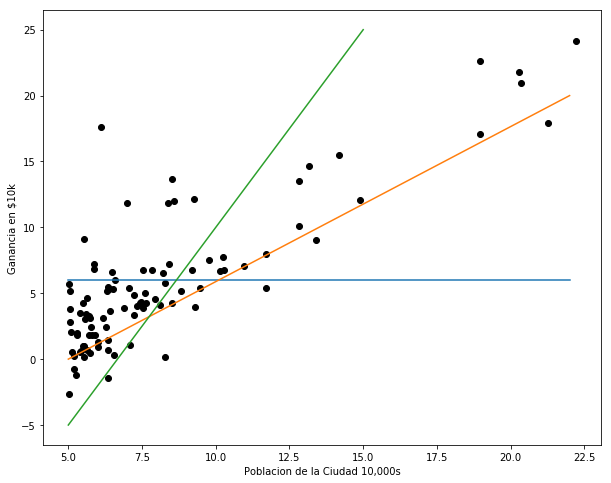

In [6]:
plt.figure(figsize=(10,8))
plt.plot(X_df, y_df, 'ko')
plt.plot([5, 22], [6,6], '-')
plt.plot([5, 22], [0,20], '-')
plt.plot([5, 15], [-5,25], '-')
plt.xlabel('Poblacion de la Ciudad 10,000s')
plt.ylabel('Ganancia en $10k')

## Funcion de Costo

Funcion de costo a minimizar: (simple funcion cuadratica)
$$J(\theta_0,\theta_1) = \frac{1}{2m}\sum_{i=1}^m(h_\theta(x^{(i)})-y^{(i)})^2$$

Hipotesis de nuestro modelo lineal:
$$h_\theta(x) = \theta^{T}x = \theta_0 + \theta_1x_1$$

Buscamos $\theta_j$ para minimizar $J(\theta)$.  Cada iteracion calcula la actualizacion de parametros pro medio de la siguiente expresion:
$$\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})x_{j}^{(i)}$$

In [7]:
# How do we find the best model from all the possible onesx_quad = [float(n)/10.0 for n in range(0, 100)]
x_quad;
y_quad = [(n-4)**2+5 for n in x_quad]

Text(0.5, 1.0, 'La funcion de costos es una cuadratica simple')

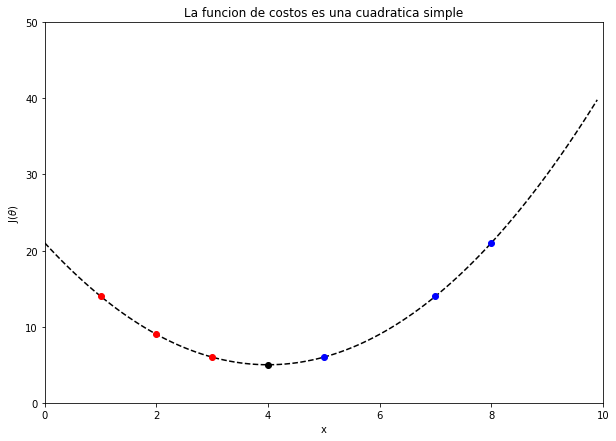

In [8]:

plt.figure(figsize = (10,7))
plt.plot(x_quad, y_quad, 'k--')
plt.axis([0,10,0,50])
plt.plot([1, 2, 3], [14, 9, 6], 'ro')
plt.plot([5, 7, 8],[6, 14, 21], 'bo')
plt.plot(4,5, 'ko')
plt.xlabel('x')
plt.ylabel("J($\\theta$)")
plt.title('La funcion de costos es una cuadratica simple')

In [10]:
iterations = 1500 #asumimos convergencia
alpha = 0.01   #Ritmo de aprendizaje

In [12]:
y_df.head()

,ganancia
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [33]:
## Agregamos una columna de unos porque no existe x_o para la ordenada al origen
X_df['intercept'] = 1

## Construimos una matrix para X
X = np.array(X_df)# we want this dim=2
y = np.array(y_df).flatten()  #dim1, flatten concatena arrays de arrays en uno solo continuo, chk zip
theta = np.array([0, 0]) #vector inicializado con ceros

No sklearn, a patita! :)

In [34]:
def cost_function(X, y, theta):
    """
    Funcion de costo
    """
    ## Numero de puntos en el dataset
    m = len(y) 
    
    J = np.sum((X.dot(theta)-y)**2)/2/m
    
    return J

In [35]:
cost_function(X, y, theta)

32.072733877455676

In [26]:
def gradient_descent(X, y, theta, alpha, iterations):
    
    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        hypothesis = X.dot(theta) # inicialmente las thetas son ceros 
        loss = hypothesis-y # Este es el error, que al principio 
        gradient = X.T.dot(loss)/m  #Transpose
        theta = theta - alpha*gradient
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost

    return theta, cost_history
     

In [27]:
(t, c) = gradient_descent(X,y,theta,alpha, iterations)

In [28]:
## Print parameters of the model theta_1,theta_0
print(t)

[ 1.16636235 -3.63029144]


In [29]:
## Ejemplo de prediccion en dos puntos x=3.5 y x=7, 
print(np.array([3.5, 1]).dot(t))
print(np.array([7, 1]).dot(t))

0.45197678677017716
4.534245012944714


In [17]:
## Plotting the best fit line
h_x = np.linspace(0, 25, 20) #entre 0 y 25 quiero 20 puntos regularmente espaciados
h_y = [t[1] + t[0]*xx for xx in h_x]

Text(0.5, 1.0, 'Modelo de Regresion Lineal Poblacion vs Ganancia')

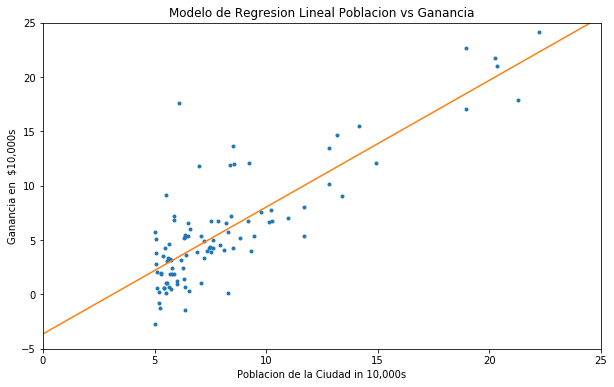

In [18]:
plt.figure(figsize=(10,6))
plt.plot(X_df.poblacion, y_df, '.')
plt.plot(h_x, h_y, '-')
plt.axis([0,25,-5,25])
plt.xlabel('Poblacion de la Ciudad in 10,000s')
plt.ylabel('Ganancia en  $10,000s')
plt.title('Modelo de Regresion Lineal Poblacion vs Ganancia')

# Logistic Regression

In [19]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.0.


In [20]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

### Data ingestion

In [21]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("data/pima-indians-diabetes.csv", header=None, names=col_names)

In [22]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [23]:
pima.shape

(768, 9)

### Data Overview

- The database contains only data about female patients who are of Pima Indian heritage are 21 or older
- All the attributes are numeric
- The data may contain invalid or null values
- Total number of cases presented are 786

Columns

- pregnancies - Number of times pregnant
- Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure - Diastolic blood pressure (mm Hg)
- SkinThickness - Triceps skin fold thickness (mm)
- Insulin - 2-Hour serum insulin (mu U/ml)
- BMI - Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction - Diabetes pedigree function
- Age - Age (years)
- label - Class variable (0 or 1) class value 1 is interpreted as "tested positive for diabetes

Class distribution: 
    
0 : 500 
    
1 : 268 

In [24]:
pima['label'].value_counts()

0    500
1    268
Name: label, dtype: int64

In [25]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

### Split X and y into training and testing sets

- Dataset is broken into two parts in a ratio of 75:25. 
- It means 75% data will be used for model training and 25% for model testing.

In [26]:
 from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

### Build a model

In [27]:
#import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)
#warning relevant for multiclass only 

/home/benjamin/ensembles/myenviro/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
# ASIDE PREPROCESSING NOTE: in case your scores are NOT in the right data format
from sklearn import preprocessing
from sklearn import utils
print(utils.multiclass.type_of_target(y_train))
#lab_enc = preprocessing.LabelEncoder()
#encoded = lab_enc.fit_transform(y_train)
#print(utils.multiclass.type_of_target(encoded))


binary


### Model Evaluation

In [29]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]])

- Remember we had 192 tests points, 25% of 768
- The dimension of this matrix is 2*2 because this model is binary classification. 
- Two classes 0 and 1. Diagonal values represent accurate predictions
- Non-diagonal elements are inaccurate predictions. 
- In the output, 119 and 36 are actual predictions
- 26 and 11 are incorrect predictions.

### Visualizing Confusion Matrix using Heatmap

In [30]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [31]:
pd.DataFrame(cnf_matrix)

,0,1
0,119,11
1,26,36


Text(0.5, 257.44, 'Predicted label')

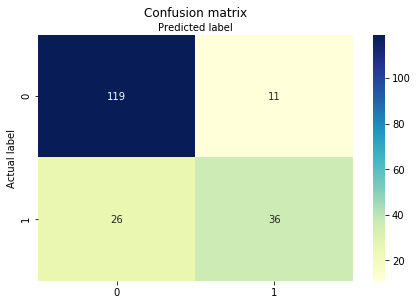

In [32]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

![cm](media/confusion_matrix.png)

### Confusion Matrix Evaluation Metrics

In [33]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226


- 80%, considered as good accuracy.

- Precision: You can say, when a model makes a prediction, how often it is correct. 
    - In your prediction case, when your Logistic Regression model predicted patients 
     are going to suffer from diabetes, that patients have 76% of the time.

- Recall: Patients who have diabetes in the test set and your Logistic Regression 
    model can correctly identify them at a rate  58% of the time.


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       130
           1       0.77      0.58      0.66        62

   micro avg       0.81      0.81      0.81       192
   macro avg       0.79      0.75      0.76       192
weighted avg       0.80      0.81      0.80       192



### ROC Curve

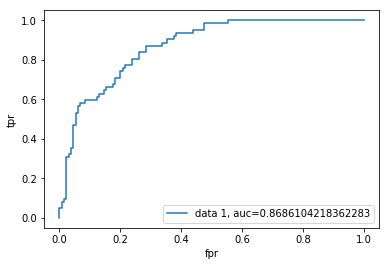

In [35]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.show()

- AUC score for the case is 0.86. 
- AUC score 1 represents perfect classifier
- 0.5 represents a worthless classifier.

- Advantages
  - Because of its efficient and straightforward nature, doesn't require high computation power, 
  - Easy to implement, easily interpretable
  - It doesn't require scaling of features. 
  - Often provides better ROC than tree methods 

- Disadvantages
  - Logistic regression is not able to handle a large number of categorical features/variables. 
  - It is vulnerable to overfitting. 
  - Logistic regression will not perform well with independent variables that are not correlated to the target variable 
    and are very similar or correlated to each other.

